In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,SpectralClustering
from scipy import linalg
import seaborn as sns; sns.set()
import re
import itertools

In [2]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-stsb-mean-tokens')

In [54]:
# Read it in
survey_40 = pd.read_csv('survey_40.csv')

In [56]:
survey_40

,Unnamed: 0,subject_id,image_name,image_name_2,T0,T1,T2,T3,T4,T5
0,0,20742087,2521127-13-0142.jpg,NaN,A document that contains one question (Q.88),NaN,NaN,My criticism is this: Senior officers should p...,NaN,NaN
1,1,20742096,2521127-13-0143.jpg,NaN,A document that contains one question (Q.88),NaN,NaN,"Too much stress is placed on the ""Junior Offic...",NaN,none
2,2,20742102,2521127-13-0144.jpg,NaN,A document that contains one question (Q.88),NaN,NaN,The men do not get enough time off. [paragraph...,NaN,NaN
3,3,20742110,2521127-13-0145.jpg,NaN,A document that contains one question (Q.88),NaN,NaN,The mens (my schools) time is taken up in the ...,NaN,none
4,4,20742116,2521127-13-0146.jpg,NaN,A document that contains one question (Q.88),NaN,NaN,The location of this post is not suited for ta...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1218,1218,20750000,2521127-13-1376.jpg,NaN,A document that contains one question (Q.88),NaN,NaN,We should not have the same thing day after da...,NaN,NaN
1219,1219,20750004,2521127-13-1377.jpg,NaN,A document that contains one question (Q.88),NaN,NaN,I do not agree with the National Guardsmen on ...,NaN,NaN
1220,1220,20750008,2521127-13-1378.jpg,NaN,A document that contains one question (Q.88),NaN,NaN,I do believe training programs should be chang...,NaN,NaN
1221,1221,20750010,2521127-13-1379.jpg,NaN,A document that contains one question (Q.88),NaN,NaN,I believe that enlisted men should be giving t...,NaN,NaN


In [57]:
len(survey_40)

1223

In [58]:
no_float = [i for i in survey_40['T3'].tolist() if type(i) != float]
no_unclear = [i for i in no_float if '[unclear]' not in i]

In [59]:
embed = model.encode(no_unclear)
first = pd.DataFrame({'Response': no_unclear, 'Embedding': embed})
second = pd.DataFrame({'Response': no_unclear})

In [60]:
for i in range(0, 768):
    x = []
    for j in range(0, len(embed)):
        x.append(first['Embedding'][j][i])
    second['x'+str(i)] = x

In [61]:
second.iloc[:, 1:]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x758,x759,x760,x761,x762,x763,x764,x765,x766,x767
0,-0.422326,0.092550,0.733197,0.492622,-0.511888,-0.346319,0.286839,-0.385252,0.398126,-0.213543,...,-0.297408,-0.061568,-0.292067,-3.063446,-1.045430,0.020541,-0.130146,0.407433,-0.415785,-0.294007
1,-0.558739,-0.227968,0.870968,0.494883,-0.196091,-0.248421,0.354274,-0.264491,0.630206,-0.766950,...,-0.532696,-0.394978,-0.632359,-2.108295,-0.944126,0.215347,-0.054073,0.613488,-0.549291,0.750456
2,0.078517,0.243764,0.623894,0.445617,-0.535047,0.352846,0.997637,-0.200046,0.411726,-0.972305,...,-0.199377,0.452974,-0.231664,-3.043501,-0.543576,-0.231072,0.229142,0.972647,-0.505569,0.194745
3,-0.452413,0.012374,0.292558,0.220502,-0.362696,-0.504813,0.561915,-0.944626,0.438334,-0.019497,...,-0.866033,-0.144358,-0.491476,-1.661311,-1.095372,-0.229269,0.037248,0.830799,-0.334356,-0.309428
4,-0.675999,0.421742,0.356232,0.482641,0.290257,-0.801562,1.212314,-0.713638,0.499186,-0.802754,...,-0.229743,0.031294,-0.631737,-1.658962,-0.667047,-0.131259,-0.099409,0.738065,-0.396772,0.608597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.134504,0.416020,0.435890,0.113885,0.469218,0.229231,0.922816,-0.366361,-0.019335,-0.790147,...,0.079887,0.483429,0.388868,-1.879244,-0.646699,0.258150,-0.268132,1.029354,-0.518865,-0.053394
1034,-0.067994,-0.189804,0.059397,0.740314,-0.682780,-0.341905,0.077691,-0.268206,0.408718,-0.585208,...,-0.401033,0.687849,-0.405456,-2.055048,-0.317738,-0.009209,0.752603,-0.276079,-1.034624,1.159416
1035,0.650752,-0.139623,0.601836,0.261732,0.115647,0.364238,0.861056,-0.908669,0.740340,-1.263317,...,-0.597013,0.161920,-0.549242,-1.938351,-0.272798,0.200285,-0.123204,0.963479,-0.771642,0.707572
1036,0.410834,-0.121540,1.352237,0.356899,0.361782,-0.200515,0.535223,0.083675,-0.256037,-1.507825,...,0.303884,-0.141390,0.531924,-1.064502,0.075255,0.231455,0.217479,1.112987,0.199064,-0.241590


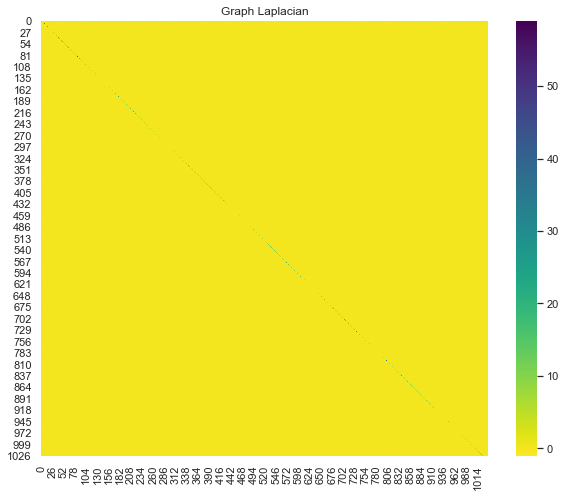

In [62]:
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

from sklearn.neighbors import kneighbors_graph
from scipy import sparse

def generate_graph_laplacian(df, nn):
    """Generate graph Laplacian from data."""
    # Adjacency Matrix.
    connectivity = kneighbors_graph(X=df, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    # Graph Laplacian.
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
    graph_laplacian = graph_laplacian_s.toarray()
    return graph_laplacian 
    
graph_laplacian = generate_graph_laplacian(df=second.iloc[:,1:], nn=8)

# Plot the graph Laplacian as heat map.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')
ax.set(title='Graph Laplacian');

In [63]:
eigenvals, eigenvcts = linalg.eig(graph_laplacian)
np.unique(np.imag(eigenvals))

array([0.])

In [64]:
# We project onto the real numbers. 
def compute_spectrum_graph_laplacian(graph_laplacian):
    """Compute eigenvalues and eigenvectors and project 
    them onto the real numbers.
    """
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    return eigenvals, eigenvcts

eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)

In [65]:
eigenvcts_norms = np.apply_along_axis(
  lambda v: np.linalg.norm(v, ord=1), 
  axis=0, 
  arr=eigenvcts
)

print('Min Norm: ' + str(eigenvcts_norms.min()))
print('Max Norm: ' + str(eigenvcts_norms.max()))

Min Norm: 2.301094111444089
Max Norm: 32.218007387174026


In [66]:
eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]

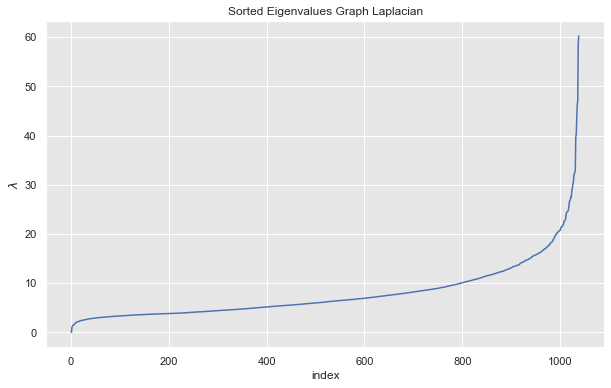

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$');

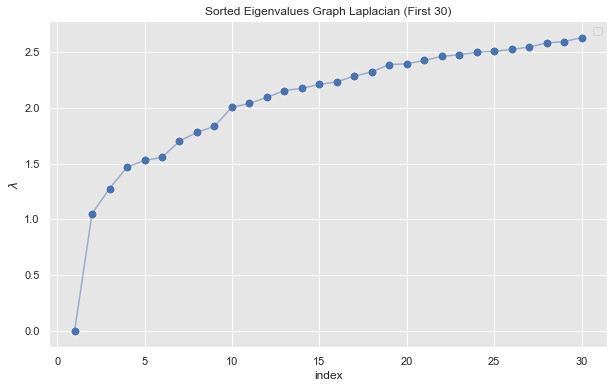

In [68]:
index_lim = 30

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], alpha=0.5, ax=ax)
# ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

In [69]:
spectral = SpectralClustering(n_clusters=4,affinity='nearest_neighbors').fit(second.iloc[:, 1:])
first['Cluster'] = [i for i in spectral.labels_]
first['bag'] = first.Response.map(lambda t:t.replace(';','').lower().split())
first

,Response,Embedding,Cluster,bag
0,"Too much stress is placed on the ""Junior Offic...","[-0.42232606, 0.0925497, 0.7331967, 0.4926224,...",0,"[too, much, stress, is, placed, on, the, ""juni..."
1,The location of this post is not suited for ta...,"[-0.55873936, -0.22796775, 0.8709675, 0.494882...",0,"[the, location, of, this, post, is, not, suite..."
2,"In all, I feel that these soldiers are far fro...","[0.07851719, 0.2437644, 0.62389386, 0.44561705...",0,"[in, all,, i, feel, that, these, soldiers, are..."
3,There should be more opportunity for the [unde...,"[-0.4524132, 0.012374308, 0.2925577, 0.2205016...",0,"[there, should, be, more, opportunity, for, th..."
4,The U.S. army has developed into a book army. ...,"[-0.6759994, 0.42174187, 0.35623154, 0.4826406...",0,"[the, u.s., army, has, developed, into, a, boo..."
...,...,...,...,...
1033,In regard to placing a soldier in the proper p...,"[0.13450432, 0.41601968, 0.43588966, 0.1138852...",0,"[in, regard, to, placing, a, soldier, in, the,..."
1034,I do not agree with the National Guardsmen on ...,"[-0.06799393, -0.18980399, 0.05939696, 0.74031...",0,"[i, do, not, agree, with, the, national, guard..."
1035,I do believe training programs should be chang...,"[0.6507516, -0.13962348, 0.60183555, 0.2617322...",2,"[i, do, believe, training, programs, should, b..."
1036,I believe that enlisted men should be giving t...,"[0.4108344, -0.12154045, 1.3522369, 0.35689873...",2,"[i, believe, that, enlisted, men, should, be, ..."


In [3]:
survey_64 = pd.read_csv('survey_64.csv')

In [4]:
no_float = [i for i in survey_64['T7'].tolist() if type(i) != float]
no_unclear = [i for i in no_float if '[unclear]' not in i]

In [6]:
embed = model.encode(no_unclear)
first = pd.DataFrame({'Response': no_unclear, 'Embedding': embed})
second = pd.DataFrame({'Response': no_unclear})

In [7]:
for i in range(0, 768):
    x = []
    for j in range(0, len(embed)):
        x.append(first['Embedding'][j][i])
    second['x'+str(i)] = x

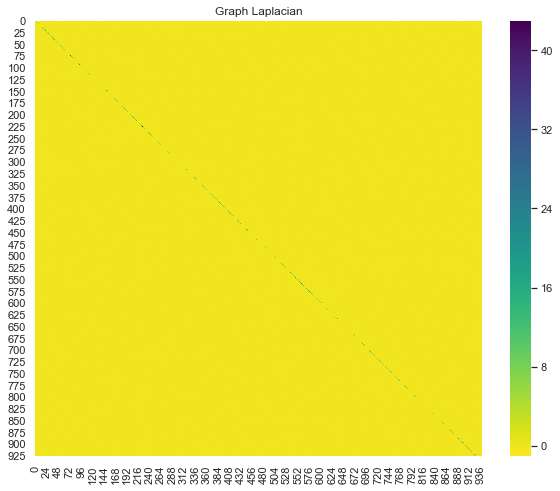

In [8]:
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

from sklearn.neighbors import kneighbors_graph
from scipy import sparse

def generate_graph_laplacian(df, nn):
    """Generate graph Laplacian from data."""
    # Adjacency Matrix.
    connectivity = kneighbors_graph(X=df, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    # Graph Laplacian.
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
    graph_laplacian = graph_laplacian_s.toarray()
    return graph_laplacian 
    
graph_laplacian = generate_graph_laplacian(df=second.iloc[:,1:], nn=8)

# Plot the graph Laplacian as heat map.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')
ax.set(title='Graph Laplacian');

In [9]:
eigenvals, eigenvcts = linalg.eig(graph_laplacian)
np.unique(np.imag(eigenvals))

array([0.])

In [10]:
# We project onto the real numbers. 
def compute_spectrum_graph_laplacian(graph_laplacian):
    """Compute eigenvalues and eigenvectors and project 
    them onto the real numbers.
    """
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    return eigenvals, eigenvcts

eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)

In [11]:
eigenvcts_norms = np.apply_along_axis(
  lambda v: np.linalg.norm(v, ord=1), 
  axis=0, 
  arr=eigenvcts
)

print('Min Norm: ' + str(eigenvcts_norms.min()))
print('Max Norm: ' + str(eigenvcts_norms.max()))

Min Norm: 2.6549526724803703
Max Norm: 30.62678566222709


In [12]:
eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]

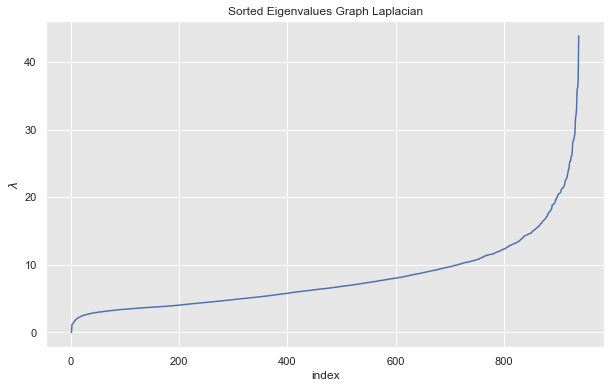

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$');

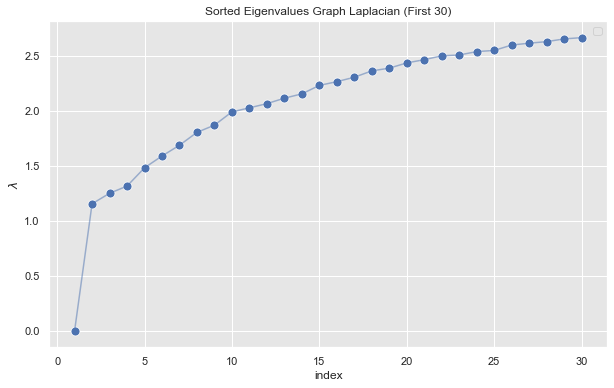

In [14]:
index_lim = 30

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], alpha=0.5, ax=ax)
# ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

In [18]:
spectral = SpectralClustering(n_clusters=4,affinity='nearest_neighbors').fit(second.iloc[:, 1:])
first['Cluster'] = [i for i in spectral.labels_]
first['bag'] = first.Response.map(lambda t:t.replace(';','').lower().split())
first

,Response,Embedding,Cluster,bag
0,There is such a thing as prejudice in this arm...,"[0.1699564, 0.57617515, 0.30521023, 0.8890215,...",0,"[there, is, such, a, thing, as, prejudice, in,..."
1,I'll like to go into combat and fight. That's ...,"[0.13138291, -0.24039118, 0.8729173, 0.4838235...",3,"[i'll, like, to, go, into, combat, and, fight...."
2,I think the army would be a lot better if the ...,"[-0.33606243, -0.34791276, -0.21516825, 0.7292...",0,"[i, think, the, army, would, be, a, lot, bette..."
3,I think some outfits get more breaks than othe...,"[-0.10866141, 0.00807412, -0.31280532, 0.25040...",0,"[i, think, some, outfits, get, more, breaks, t..."
4,As a quarter master outfit I feel like we shou...,"[0.20223469, 0.47886428, 0.21240284, -0.135440...",0,"[as, a, quarter, master, outfit, i, feel, like..."
...,...,...,...,...
933,besides the coal strikes which grief me extrem...,"[0.42243466, -0.52338254, -0.048366357, 0.2493...",0,"[besides, the, coal, strikes, which, grief, me..."
934,The army as a whole does very well. I expect a...,"[0.004569292, 0.15043795, -0.20711683, 0.40125...",0,"[the, army, as, a, whole, does, very, well., i..."
935,The Army Technical School to my opinion could ...,"[-0.1428335, -0.150794, 0.76927316, 0.34600088...",0,"[the, army, technical, school, to, my, opinion..."
936,Many of these questions don't apply to our squ...,"[0.358985, 0.33256057, 0.52928954, 0.34767458,...",0,"[many, of, these, questions, don't, apply, to,..."


In [73]:
cluster_0 = [i for i in first['Response'][first['Cluster'] == 0]]

In [74]:
cluster_0

["There is such a thing as prejudice in this army and racist hatred. That damn wop that lousy Jew or that dirty German - We're all fighting for one thing and one country so the quicker we learn to cooperate the better off we'll be. United we stand separate we fall.",
 "I think the army would be a lot better if the officers had more training & so much time wasn't wasted just hanging around. I think just hanging around doing nothing brings about most of the discontentment in the army & I also think most of us soldiers feel that the war is just another way of throwing away money.",
 "I think some outfits get more breaks than other boys do. and I don't see any reason for it. I think all outfits should get a lot of breaks while in the States because when they go overseas, they all have it pretty tough.",
 'As a quarter master outfit I feel like we should get more experience at Driving. I have fund in the army over 7 months an have only drove a truck about 75 miles, and if I am going to be a

# Including my necessary functions

In [75]:
def split_responses(responses):
    all_sentences = []
    response_numbers = []
    idx = 0
    for i in responses:
        temp = i.split('. ')
        for k in temp:
            response_numbers.append(idx)
        for j in temp:
            all_sentences.append(j)
        idx += 1
    return all_sentences, response_numbers

In [76]:
def get_index(rankings, responses):
    response_idx = []
    count = 0
    for i in rankings:
        temp = responses[i]
        if temp not in response_idx:
            response_idx.append(temp)
    return response_idx

In [77]:
embed_split_0 = model.encode(split_responses(cluster_0)[0])

In [78]:
U, S, Vt = linalg.svd(embed_split_0, full_matrices = False)

In [99]:
def DEIM(M): # row/column selection
        p = []
        p.append(np.argmax(np.abs(M[:,0]))) # row index of the largest value in the first column of M
        for i in range(1,323):
            res = M[:,i] - np.dot(M[:,:i],np.dot(np.linalg.inv(M[:,:i][p]), M[:,i][p]))
            p.append(np.argmax(np.abs(res)))
        return p

In [80]:
ranking_0 = DEIM(U)

In [81]:
sentences_0, response_number_0 = split_responses(cluster_0)

In [82]:
[cluster_0[i] for i in get_index(ranking_0, response_number_0)]

['I realize that the army is a very large organization to run, but they could surely do a better job of placing their men where they are best fitted. "for instance" if a man comes in the army that has been a specialised mechanic all his life, the army will no doubt place him in the guard sqd. or send him to a cook &',
 'It takes too long to relieve a man when he is on guard. The Marine guard is much more efficient in this respect as each man goes to his own post without being marched around the whole regiment by a corporal of the guard. Some of our N.C.O. are kids who never did a good days work in their lives or had men under them. So they seem to',
 "I haven't had a 24 hour pass since I arrived here 2.1/2 months ago and also have not had a day off as well. The transportation system is very poorly run. Headquarters seem to be trying to run down the morale of the men instead of building it up and doesn't seem to know what it is doing. All my troubles could be eased however if I could",


In [83]:
ranking_0[0]

1047

In [84]:
sentences_0[1047]

'I realize that the army is a very large organization to run, but they could surely do a better job of placing their men where they are best fitted'

In [85]:
ranking_0[1]

17

In [86]:
sentences_0[17]

'So they seem to'

## For cluster 1

In [87]:
cluster_1 = [i for i in first['Response'][first['Cluster'] == 1]]

In [88]:
embed_split_1 = model.encode(split_responses(cluster_1)[0])

In [89]:
U1, S1, Vt1 = linalg.svd(embed_split_1, full_matrices = False)

In [90]:
ranking_1 = DEIM(U1)

In [91]:
sentences_1, response_number_1 = split_responses(cluster_1)

In [92]:
[cluster_1[i] for i in get_index(ranking_1, response_number_1)]

["In re #96, the war has made things better for my friends and some of my relatives, but in my own family it has quartered our income. My wife and child are living on my army pay plus a portion of our savings, when our savings are gone, I don't know what they will do. My wife is not well enough to work, and my army pay is not large enough to live on. I have a personal gripe, in that I tried to enlist and was refused, but was accepted by the draft. Discharge all venereal cases, with their resultant chances of spreading infection.",
 "This pertains as far as I know to our company. We have been here too long and none of the fellows like it here at this camp. Most of us have been here for at least six months and we don't seem to be learning what we should. All this doesn't do our morale much good. In fact",
 "Sir, I feel just this way. I got married after a years service in the army. Planned on it before but wouldn't for the reason that the public would feel that I was a draft dodger. And 

In [93]:
sentences_1[ranking_1[0]]

'My wife is not well enough to work, and my army pay is not large enough to live on'

In [94]:
sentences_1[ranking_1[1]]

'In fact'

## For Cluster 2

In [95]:
cluster_2 = [i for i in first['Response'][first['Cluster'] == 2]]
embed_split_2 = model.encode(split_responses(cluster_2)[0])
U2, S2, Vt2 = linalg.svd(embed_split_2, full_matrices = False)
ranking_2 = DEIM(U2)
sentences_2, response_number_2 = split_responses(cluster_2)
[cluster_2[i] for i in get_index(ranking_2, response_number_2)]


['Need better cooks at this camp they have good food to cook but they make hell of a mess cooking it. I feel that lots of time is wasted in school if they would take advantage of the time they would not have to get up in the middle of the night to start. 6 hours a day should be plenty.',
 'I would like to be back in what I was trained for. I have lots of duties and no chance for a promotion. The officers have picks. The food could be better and cooked better. Every one could be treated more the same. Each man could placed where he fit best. ',
 "I don't think we have enough time to ourselves. When we get through with our regular duties it is 6:30 in the evening and by the time we have eaten, washed, gotten our mail and get into town it is almost time to get back to camp for bed check. They changed our check from 1 A.M. to 11:30 P.M. I think the food could be better.",
 "Maybe if we [insertion]were[/insertion] given good food that good non-coms officers people wouldn't mind staying in t

In [96]:
sentences_2[ranking_2[0]]

'Need better cooks at this camp they have good food to cook but they make hell of a mess cooking it'

In [97]:
sentences_2[ranking_2[1]]

'Every one could be treated more the same'

## For Cluster 3

In [100]:
cluster_3 = [i for i in first['Response'][first['Cluster'] == 3]]
embed_split_3 = model.encode(split_responses(cluster_3)[0])
U3, S3, Vt3 = linalg.svd(embed_split_3, full_matrices = False)
ranking_3 = DEIM(U3)
sentences_3, response_number_3 = split_responses(cluster_3)
[cluster_3[i] for i in get_index(ranking_3, response_number_3)]

['A soldier should be stationed nearer home. He would like the Army much better if so. He would have more to do and see his friends more often. We should have more rifle practice than what we do and instead of seeing the way things are done in pictures',
 'Back over a few pages in the questions about the Japs and Germans, I said they should be wiped off the face of the earth, well I still think so but if they surrendered and gave up all that they have captured and agreed to some very strict peace terms and prepare in some way to hold them to those terms it might be all right to let them surrender. ',
 'I would like to get out of this camp pretty soon and get a furlough.',
 "It would be a pretty good idea to give men like myself and many others like me who have put in from 6 months to a year service at least a 10 or 15 day furlough. It would make them a lot happier and they would enjoy working harder. There isn't any use putting down any more because I honestly don't believe it will do 

In [101]:
sentences_3[ranking_3[0]]

'He would like the Army much better if so'

In [102]:
sentences_3[ranking_3[1]]

''